In [1]:
include("src/ResearchMetrics.jl")
using .ResearchMetrics
using Serialization
using Plots
using Dates
using CurveFit
using TimeSeries

# The researchers

In [2]:
researchers = [ 
    Researcher("Hommelhoff",
               "Universität Erlangen-Nürnberg",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2022-01-01")])
    Researcher("Martínez-Pinedo",
               "Technische Universitat Darmstadt",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2022-01-01")])
    Researcher("André",
               "Universität Augsburg",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2021-01-01")])
    Researcher("Haddadin",
               "Technische Universität München",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2019-01-01")])
    Researcher("Wessling", 
               "RWTH",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2019-01-01")])
    Researcher("Schölkopf",
               "MPI",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2018-01-01")])
    Researcher("Mädler",
               "Universität Bremen",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2017-01-01")])
    Researcher("Grimme",
               "Universität Bonn",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2015-01-01")])
    Researcher("Dreizler",
               "Technische Universität Darmstadt",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2014-01-01")])
    Researcher("Merklein",
               "Universität Erlangen-Nürnberg",
               prizes = [Prize("Gottfried Wilhelm Leibniz Prize", "2013-01-01")])
];

# Scraping information

In [3]:
function setinfoforhindex!(researcher::Researcher)
    setScopusAuthorSearch!(researcher, only_local=true)
    setScopusSearch!(researcher, progress_bar=true, only_local=true)
    mappublications(x -> setScopusAbstractRetrieval!(x, only_local=true), researcher, progress_bar=true)
    mappublications(x -> setSerpapiGScholarCite!(x, only_local=true), researcher, progress_bar=true)
    mapcitations(x -> setScopusAbstractRetrieval!(x, only_local=true), researcher, progress_bar=true)
end

setinfoforhindex! (generic function with 1 method)

# Plotting

In [16]:
function plothindexevolution(researcher::Researcher)
    # What to plot
    indication_date = dateof(prizes(researcher)[1])-Year(2)
    h_index = hindex(researcher)
    fit_start_date = first(findwhen(hindex(researchers[1])[:A] .> 5))
    h_index_before = h_index |> (y -> from(y, fit_start_date)) |> (y->to(y, indication_date))
    h_index_after = from(h_index, indication_date)
    x_h_index_before = float(Dates.value.(timestamp(h_index_before)))
    x_h_index_after = float(Dates.value.(timestamp(h_index_after)))
    y_h_index_before = float(values(h_index_before))
    y_h_index_after = float(values(h_index_after))
    fit_h_index_before = curve_fit(LinearFit, x_h_index_before, y_h_index_before)
    fit_h_index_after = curve_fit(LinearFit, x_h_index_after, y_h_index_after)
    lastname = researcher.lastname
    save_date = Dates.format(now(), "YYYY-mm-dd_HH-MM")
    # Plots
    plot(h_index, linetype=:steppre, label="h-index", title = "$lastname's h-index evolution")
    vline!([dateof(prizes(researcher)[1])-nomination_offset], linestyle=:dash, label = "Indication for prize")
    plot!(x_h_index_before, fit_h_index_before.(x_h_index_before), label="Linear fit before indication")
    plot!(x_h_index_after, fit_h_index_after.(x_h_index_after), label="Linear fit after indication")
    #savefig("output/hindex_$(lastname)_$(save_date).png")
end

plothindexevolution (generic function with 1 method)

In [5]:
setinfoforhindex!.(researchers)
#serialize("researchers.jls", researchers)
#researchers = deserialize("researchers.jls");
nomination_offset = Year(2);

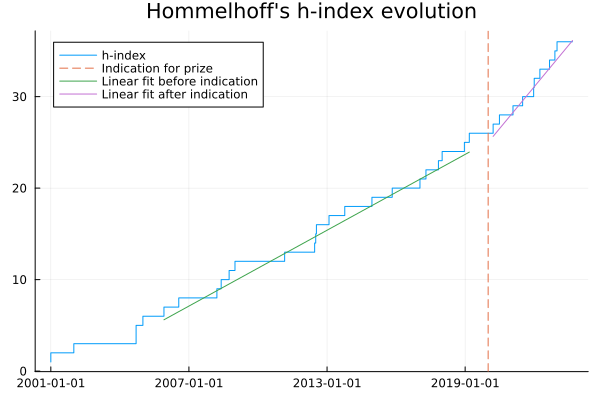

In [17]:
plothindexevolution(researchers[1])

In [7]:
plothindexevolution(researchers[2])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_Martínez-Pinedo_2023-11-02_09-58.png"

In [8]:
plothindexevolution(researchers[3])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_André_2023-11-02_09-58.png"

In [9]:
plothindexevolution(researchers[4])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_Haddadin_2023-11-02_09-58.png"

## Incomplete data

In [10]:
plothindexevolution(researchers[5])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_Wessling_2023-11-02_09-58.png"

In [11]:
plothindexevolution(researchers[6])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_Schölkopf_2023-11-02_09-58.png"

In [12]:
plothindexevolution(researchers[7])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_Mädler_2023-11-02_09-58.png"

In [13]:
plothindexevolution(researchers[8])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_Grimme_2023-11-02_09-58.png"

In [14]:
plothindexevolution(researchers[9])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_Dreizler_2023-11-02_09-58.png"

In [15]:
plothindexevolution(researchers[10])

"/home/isaac/Documents/HiWi/scientific-indicators-in-different-fields-survey/output/hindex_Merklein_2023-11-02_09-59.png"

# Hasse

In [ ]:
res_hasse = Researcher("Christian Hasse",
                       "Technische